# To implement Fitness functions

In [3]:
# install if not installed
# %pip install import-ipynb

## Import defined class: house, etc.

(1, 2)
(3, 4)
Door>> door1: {(0, 0)~(0, 0.9)}, width: 0.9, length: 2.0
Window>> window1: {(0, 0.4)~(0, 0)}, width: 0.4, length: 0.9, height: 6.0
room1: LIVING ROOM, area: 100.0, doors: door1, windows: window1, 
vertices: (0, 0), (0, 10), (10, 10), (10, 0), 
adjacent rooms: 
room1: LIVING ROOM, area: 12.0, doors: door1, windows: window1, 
vertices: (0, 0), (0, 3), (4, 3), (4, 0), 
adjacent rooms: room2, room3, room6
room2: DINING ROOM, area: 12.0, doors: door2, windows: window2, 
vertices: (0, 3), (0, 6), (4, 6), (4, 3), 
adjacent rooms: room1, room3
room3: KITCHEN, area: 13.0, doors: door3, windows: window3, 
vertices: (4, 2), (4, 6), (8, 6), (8, 3), (5, 3), (5, 2), 
adjacent rooms: room1, room2, room4, room5, room6, room7, room8
room4: BEDROOM, area: 4.0, doors: door4, windows: window4, 
vertices: (8, 4), (8, 6), (10, 6), (10, 4), 
adjacent rooms: room3, room5
room5: MASTER BEDROOM, area: 2.0, doors: door5, windows: window5, 
vertices: (8, 3), (8, 4), (10, 4), (10, 3), 
adjacent rooms

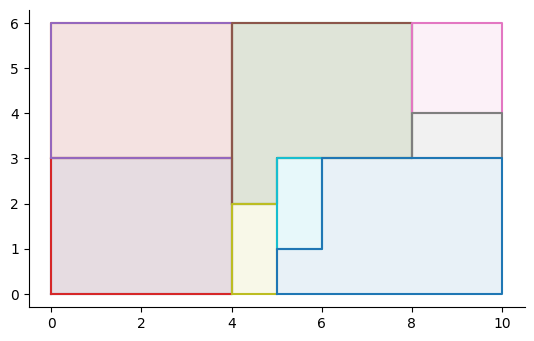

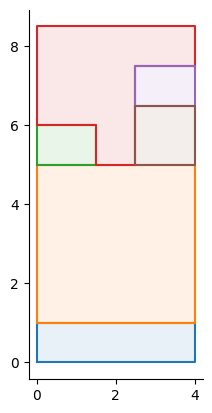

In [4]:
import import_ipynb
from floor_plan import Vertex
from floor_plan import Door
from floor_plan import Window
from floor_plan import Room
from floor_plan import RoomType
from floor_plan import House
from floor_plan import draw_house


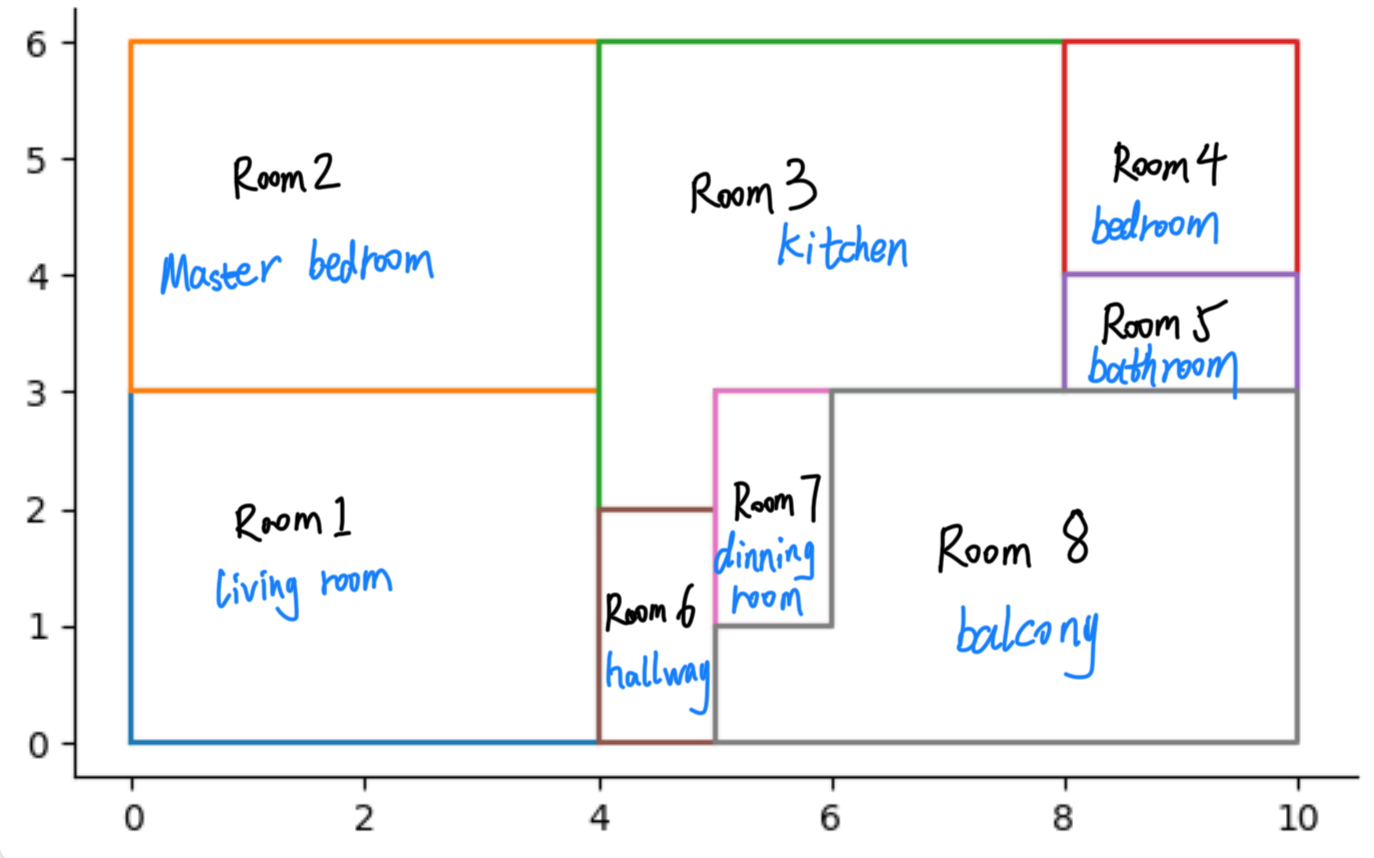

House: 8 rooms, 
adjacent matrix: [], 
adjacent list: []


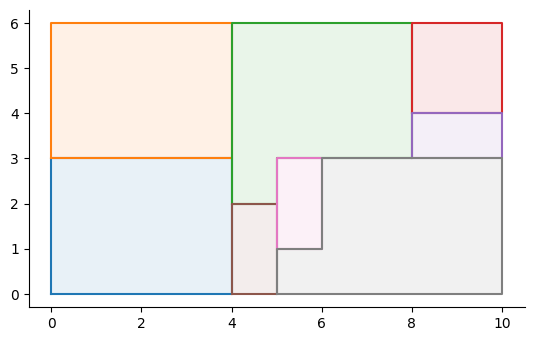

In [5]:
# create new rooms with different types
# every room has a door and a window on the wall, no collapes
vertices1 = [Vertex(0, 0), Vertex(0, 3), Vertex(4, 3), Vertex(4, 0)]
vertices2 = [Vertex(0, 3), Vertex(0, 6), Vertex(4, 6), Vertex(4, 3)]
vertices3 = [Vertex(4, 2), Vertex(4, 6), Vertex(8, 6), Vertex(8, 3), Vertex(5, 3), Vertex(5, 2)]
vertices4 = [Vertex(8, 4), Vertex(8, 6), Vertex(10, 6), Vertex(10, 4)]
vertices5 = [Vertex(8, 3), Vertex(8, 4), Vertex(10, 4), Vertex(10, 3)]
vertices6 = [Vertex(4, 0), Vertex(4, 2), Vertex(5, 2), Vertex(5, 0)]
vertices7 = [Vertex(5, 1), Vertex(5, 3), Vertex(6, 3), Vertex(6, 1)]
vertices8 = [Vertex(5, 0), Vertex(5, 1), Vertex(6, 1), Vertex(6, 3), Vertex(10, 3), Vertex(10, 0)]

# Create doors for each room
door1 = Door('door1', Vertex(0, 0), Vertex(0, 1))
door2 = Door('door2', Vertex(0, 3), Vertex(0, 4))
door3 = Door('door3', Vertex(4, 2), Vertex(4, 3))
door4 = Door('door4', Vertex(8, 4), Vertex(8, 5))
door5 = Door('door5', Vertex(8, 3), Vertex(8, 4))
door6 = Door('door6', Vertex(4, 0), Vertex(4, 1))
door7 = Door('door7', Vertex(5, 1), Vertex(5, 2))
door8 = Door('door8', Vertex(5, 0), Vertex(5, 1))

# Create windows for each room
window1 = Window('window1', Vertex(0, 3), Vertex(0, 4), length=0.9, height=6.0)
window2 = Window('window2', Vertex(4, 2), Vertex(4, 3), length=0.9, height=6.0)
window3 = Window('window3', Vertex(8, 4), Vertex(8, 5), length=0.9, height=6.0)
window4 = Window('window4', Vertex(8, 3), Vertex(8, 4), length=0.9, height=6.0)
window5 = Window('window5', Vertex(5, 1), Vertex(5, 2), length=0.9, height=6.0)
window6 = Window('window6', Vertex(5, 0), Vertex(5, 1), length=0.9, height=6.0)
window7 = Window('window7', Vertex(5, 1), Vertex(6, 1), length=0.9, height=6.0)
window8 = Window('window8', Vertex(0, 0), Vertex(0, 1), length=0.9, height=6.0)

# Create rooms
room1 = Room('room1', RoomType.LIVING_ROOM, vertices1, [door1], [window1])
room2 = Room('room2', RoomType.MASTER_BEDROOM, vertices2, [door2], [window2])
room3 = Room('room3', RoomType.KITCHEN, vertices3, [door3], [window3])
room4 = Room('room4', RoomType.BEDROOM, vertices4, [door4], [window4])
room5 = Room('room5', RoomType.BATHROOM, vertices5, [door5], [window5])
room6 = Room('room6', RoomType.HALLWAY, vertices6, [door6], [window6])
room7 = Room('room7', RoomType.DINING_ROOM, vertices7, [door7], [window7])
room8 = Room('room8', RoomType.BALCONY, vertices8, [door8], [])

# Add adjacent rooms 
room1.adjacent_rooms = [room2, room3, room6]
room2.adjacent_rooms = [room1, room3]
room3.adjacent_rooms = [room1, room2, room4, room5, room6, room7, room8]
room4.adjacent_rooms = [room3, room5]
room5.adjacent_rooms = [room3, room4, room8]
room6.adjacent_rooms = [room1, room3, room7, room8]
room7.adjacent_rooms = [room3, room6, room8]
room8.adjacent_rooms = [room3, room5, room6, room7]

rooms = [room1, room2, room3, room4, room5, room6, room7, room8]
house1 = House(rooms)
print(house1)
draw_house(house1)

## Min-Max normalization equation
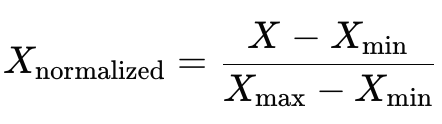  
All normalised values will be in the range **[0, 1]**

# Privacy

## 1. dis (MBR, BR) + 🆗
to be maximized

In [6]:
# calculate the distance between the center of the master bedroom and bedroom
def dis_MBR_BR(house):
    # get the master bedroom and bedroom
    MBR = None
    BR = None
    for room in house.rooms:
        if room.type == RoomType.MASTER_BEDROOM:
            MBR = room
        elif room.type == RoomType.BEDROOM:
            BR = room
    if MBR is None or BR is None:
        return None
    # get the center of the master bedroom and bedroom
    MBR_center = MBR.get_centroid()
    BR_center = BR.get_centroid()
    # print(MBR_center)
    # print(BR_center)
    # calculate the distance between the center of the master bedroom and bedroom
    distance = ((MBR_center.x - BR_center.x)**2+(MBR_center.y - BR_center.y)**2)**0.5
    # print(f'Distance: {distance}')
    # normalize the distance
    normalized_distance = (distance - MBR.min_width) / (house.width+house.depth-MBR.min_width)
    return normalized_distance

In [7]:
print(f'The normalized distance between the center of the master bedroom and bedroom is {dis_MBR_BR(house1)}')

The normalized distance between the center of the master bedroom and bedroom is 0.4051545976032516


## 2. dis (MBR, BA) + 🆗
to be maximized

In [8]:
# calculate the distance between the center of the master bedroom and bathroom
def dis_MBR_BA(house):
    # get the master bedroom and bathroom
    MBR = None
    BA = None
    for room in house.rooms:
        if room.type == RoomType.MASTER_BEDROOM:
            MBR = room
        elif room.type == RoomType.BATHROOM:
            BA = room
    if MBR is None or BA is None:
        return None
    # get the center of the master bedroom and bathroom
    MBR_center = MBR.get_centroid()
    BA_center = BA.get_centroid()
    # print(MBR_center)
    # print(BA_center)
    # calculate the distance between the center of the master bedroom and bathroom
    distance = ((MBR_center.x - BA_center.x)**2+(MBR_center.y - BA_center.y)**2)**0.5
    # print(f'Distance: {distance}')
    # normalize the distance
    normalized_distance = (distance - MBR.min_width) / (house.width+house.depth - MBR.min_width)
    return normalized_distance

In [9]:
print(f'The normalized distance between the center of the master bedroom and bathroom is {dis_MBR_BA(house1)}')

The normalized distance between the center of the master bedroom and bathroom is 0.40867998754075996


# Comfort

## 3. Orientation of living room + ✅
(0: north; 1: south) , 1 is preferred (in Northern hemisphere)

In [10]:
# check the orientation of living room
def check_LR_orientation(house):
    # get the living room
    LR = None
    for room in house.rooms:
        if room.type == RoomType.LIVING_ROOM:
            LR = room
    if LR is None:
        return None
    # get the vertices of living room
    vertices = LR.vertices
    # Determine the minimum and maximum y-coordinates
    min_y = min(vertex.y for vertex in vertices)

    # check the orientation of living room (0: north; 1: south)
    if min_y == 0:
        return 1 # south
    else:
        return 0 # north

In [11]:
print(f'Living room\'s orientation is {check_LR_orientation(house1)}')

Living room's orientation is 1


## 4. Light in dining room + ✅
(0: dark; 1: bright), 1 is preferred  
natural light can come into the dining room through the window

In [12]:
# Check if dining room has a window that can receive natural light
def check_DR_natural_light(house):
    # get the dining room
    DR = None
    for room in house.rooms:
        if room.type == RoomType.DINING_ROOM:
            DR = room
            break  # Exit the loop once the dining room is found
    if DR is None:
        return None
    
    # get the windows of dining room
    windows = DR.windows
    if len(windows) == 0:
        return 0

    # check if dining room has a window that can receive natural light
    for window in windows:
        # Determine if the window is horizontal or vertical
        if window.vertex1.y == window.vertex2.y:
            # The window is horizontal
            window_orientation = 'horizontal'
        elif window.vertex1.x == window.vertex2.x:
            # The window is vertical
            window_orientation = 'vertical'
        else:
            continue  # Skip windows that are neither horizontal nor vertical

        # Check if the window can receive natural light
        natural_light = 1
        for room in house.rooms:
            if room == DR:
                continue
            for i in range(len(room.vertices)):
                vertex1 = room.vertices[i]
                vertex2 = room.vertices[(i + 1) % len(room.vertices)]
                if window_orientation == 'horizontal':
                    if (vertex1.y == window.vertex1.y and vertex2.y == window.vertex1.y and
                        not (min(window.vertex1.x, window.vertex2.x) >= max(vertex1.x, vertex2.x) or
                        max(window.vertex1.x, window.vertex2.x) <= min(vertex1.x, vertex2.x))):
                        natural_light = 0
                        break
                elif window_orientation == 'vertical':
                    if (vertex1.x == window.vertex1.x and vertex2.x == window.vertex1.x and
                        not (min(window.vertex1.y, window.vertex2.y) >= max(vertex1.y, vertex2.y) or
                        max(window.vertex1.y, window.vertex2.y) <= min(vertex1.y, vertex2.y))):
                        natural_light = 0
                        break
            if not natural_light:
                break
        
        if natural_light:
            return 1
    return 0

In [13]:
print(f'Dining room has a window for natural light: {check_DR_natural_light(house1)}')

Dining room has a window for natural light: 0


## 5. Ventilation + 🆗
(Ratio of width to depth of floor plan)  
to be maximized

In [14]:
# Calculate the Ratio of width to depth of floor plan
def ventilation(house):
    # get the width and depth of the house
    width = house.width
    depth = house.depth
    # print(width)
    # print(depth)
    
    # TODO
    min_ratio = 0.2
    max_ratio = 5.0
    # calculate the ratio of width to depth
    ratio = width / depth
    # print(f'Ratio: {ratio}')

    # normalize the ratio
    normalized_ratio = (ratio - min_ratio) / (max_ratio - min_ratio)
    return normalized_ratio

In [15]:
print(f'Normalised Ventilation(width:depth) = {ventilation(house1)}')

Normalised Ventilation(width:depth) = 0.3055555555555556


## 6. % of south-facing rooms + ✅
to be maximized

In [16]:
# Calculate the percentage of rooms that are south-facing
def south_facing(house):
    # get the rooms
    rooms = house.rooms
    # sum area of south-facing rooms
    south_facing_area = 0

    for room in rooms:
        if room.type != RoomType.BALCONY:
            vertices = room.vertices
            min_y = min(vertex.y for vertex in vertices)
            south_facing = True
            for other_room in rooms:
                if other_room != room and other_room.type != RoomType.BALCONY:
                    # if other_room is a balcony, it does not block the view
                    other_vertices = other_room.vertices
                    max_y_other = max(vertex.y for vertex in other_vertices)
                    # other_room's south border blocks the south view of the room,
                    # other room is a neighbor room
                    if max_y_other <= min_y and any(vertex.x == other_vertex.x and vertex.y == other_vertex.y for vertex in vertices for other_vertex in other_vertices):
                        south_facing = False
                        break
                    
            if south_facing:
                south_facing_area += room.area

    # calculate the percentage of rooms that is south-facing
    # print(f'Area of South-facing rooms: {south_facing_area}')
    interior_area = house.interior_area
    # print(f'Interior area of rooms: {interior_area}')
    percentage = south_facing_area / interior_area if interior_area != 0 else 0
    return percentage

In [17]:
print(f'% of south-facing rooms: {south_facing(house1)}')

% of south-facing rooms: 0.3829787234042553


# Practicality

## 7. % of hall - ✅
hall or (or **corridor**?)  
to be minimized

In [18]:
# Calculate the percentage of hall area to the interior area
def percentage_hall(house):
    # get the hall area
    hall_area = 0
    for room in house.rooms:
        if room.type == RoomType.HALLWAY:
            hall_area += room.area
    
    # get the interior area excluding balcony area
    interior_area = house.interior_area
    
    # calculate the percentage of hall area to the interior area
    percentage = hall_area / interior_area if interior_area != 0 else 0
    return 1 - percentage

In [19]:
print(f'% of hall {percentage_hall(house1)}')

% of hall 0.9574468085106383


## 8. % of balcony + ✅
to be maximised

In [20]:
# Calculate the percentage of balcony area to the interior area
def percentage_balcony(house):
    # get the area of the balcony and the interior
    balcony_area = 0
    for room in house.rooms:
        if room.type == RoomType.BALCONY:
            balcony_area += room.area

    interior_area = house.interior_area
    # calculate the percentage of balcony area to the interior area
    percentage = balcony_area / interior_area if interior_area != 0 else 0
    return percentage

In [21]:
print(f'% of balcony: {percentage_balcony(house1)}')

% of balcony: 0.2765957446808511


## 9. Efficiency rate of a house + ✅
to be maximised

In [22]:
# the percentage of interior area to the total area
def efficiency_rate(house):
    # get the area of the interior and the total area
    interior_area = 0
    total_area = house.area
    for room in house.rooms:
        if room.type != RoomType.BALCONY:
            interior_area += room.area
    # calculate the percentage of interior area to the total area
    percentage = interior_area / total_area
    return percentage

In [23]:
print(f'interior/total: {efficiency_rate(house1)}')

interior/total: 0.7833333333333333


# Convenience

## 10. DIS (BR, BA) - 🆗
to be minimised

In [24]:
# the walking distance between the bedroom and the bathroom
def DIS_BR_BA(house):
    # get the bedroom and the bathroom
    BR = None
    BA = None
    for room in house.rooms:
        if room.type == RoomType.BEDROOM:
            BR = room
        elif room.type == RoomType.BATHROOM:
            BA = room
    if BR is None or BA is None:
        return None
    
    # get the center of the bedroom and the bathroom
    BR_center = BR.get_centroid()
    BA_center = BA.get_centroid()
    
    # find the door of the bedroom and the bathroom
    BR_door = BR.doors[0] if BR.doors else None
    BA_door = BA.doors[0] if BA.doors else None
    if BR_door is None or BA_door is None:
        return None
    
    # get the center of the doors
    BR_door_center = Vertex((BR_door.vertex1.x + BR_door.vertex2.x) / 2, (BR_door.vertex1.y + BR_door.vertex2.y) / 2)
    BA_door_center = Vertex((BA_door.vertex1.x + BA_door.vertex2.x) / 2, (BA_door.vertex1.y + BA_door.vertex2.y) / 2)
    
    # calculate the walking distance
    distance = (abs(BR_center.x - BR_door_center.x) + abs(BR_center.y - BR_door_center.y) +
                abs(BR_door_center.x - BA_door_center.x) + abs(BR_door_center.y - BA_door_center.y) +
                abs(BA_door_center.x - BA_center.x) + abs(BA_door_center.y - BA_center.y))
    # print(f'Distance: {distance}')

    # normalize the distance
    normalized_distance = (distance - BR.min_width) / (house.width+house.depth - BR.min_width)
    return 1 - normalized_distance

In [25]:
print(f'Normalised Walking distance bedroom-bathroom: {DIS_BR_BA(house1)}')

Normalised Walking distance bedroom-bathroom: 0.8278145695364238


## 11. DIS (BA, BAL) - 🆗
to be minimised

In [26]:
# the walking distance between the bathroom and the balcony
def DIS_BA_BAL(house):
    # get the bathroom and the balcony
    BA = None
    BAL = None
    for room in house.rooms:
        if room.type == RoomType.BATHROOM:
            BA = room
        elif room.type == RoomType.BALCONY:
            BAL = room
    if BA is None or BAL is None:
        return None
    # get the center of the bathroom and the balcony
    BA_center = BA.get_centroid()
    BAL_center = BAL.get_centroid()

    # find the door of the bathroom and the balcony
    BA_door = BA.doors[0] if BA.doors else None
    BAL_door = BAL.doors[0] if BAL.doors else None
    if BA_door is None or BAL_door is None:
        return None
    # print(BA_door)
    # print(BAL_door)
    # get the center of the doors
    BA_door_center = Vertex((BA_door.vertex1.x + BA_door.vertex2.x) / 2, (BA_door.vertex1.y + BA_door.vertex2.y) / 2)
    BAL_door_center = Vertex((BAL_door.vertex1.x + BAL_door.vertex2.x) / 2, (BAL_door.vertex1.y + BAL_door.vertex2.y) / 2)
    
    # calculate the walking distance
    distance = (abs(BA_center.x - BA_door_center.x) + abs(BA_center.y - BA_door_center.y) +
                abs(BA_door_center.x - BAL_door_center.x) + abs(BA_door_center.y - BAL_door_center.y) +
                abs(BAL_door_center.x - BAL_center.x) + abs(BAL_door_center.y - BAL_center.y))
    # print(f'Distance: {distance}')

    # normalize the distance
    normalized_distance = (distance - BA.min_width) / (house.width+house.depth - BA.min_width)
    return 1 - normalized_distance

Door's position is important here.

In [27]:
print(f'Normalised Walking distance bathroom-balcony: {DIS_BA_BAL(house1)}')

Normalised Walking distance bathroom-balcony: 0.348955680081508


## 12. kitchen, dining room, living room in one cluster -
First, get the centroid of the cluster,  
then the distance of these 3 to the centroid should be minimised respectively  
Mean Squared Error(MSE)?

In [28]:
# Adel will give some adjacnet matrixs for this function
def cluster_KC_LV_DN(house):
    # get the kitchen, living room and dining room
    KC = None
    LV = None
    DN = None
    for room in house.rooms:
        if room.type == RoomType.KITCHEN:
            KC = room
        elif room.type == RoomType.LIVING_ROOM:
            LV = room
        elif room.type == RoomType.DINING_ROOM:
            DN = room
    if KC is None or LV is None or DN is None:
        return None
    # get the center of the kitchen, living room and dining room
    KC_center = KC.get_centroid()
    LV_center = LV.get_centroid()
    DN_center = DN.get_centroid()

    # get the center of these 3 rooms
    total_center = Vertex((KC_center.x + LV_center.x + DN_center.x) / 3, (KC_center.y + LV_center.y + DN_center.y) / 3)
    # calculate the distance between the center of the kitchen, living room and dining room
    distance = ((KC_center.x - total_center.x)**2+(KC_center.y - total_center.y)**2)**0.5 + ((LV_center.x - total_center.x)**2+(LV_center.y - total_center.y)**2)**0.5 + ((DN_center.x - total_center.x)**2+(DN_center.y - total_center.y)**2)**0.5
    
    return distance

In [29]:
print(f'Cluster KC-LV-DN: {cluster_KC_LV_DN(house1)}')

Cluster KC-LV-DN: 6.150251730378198


# Combine fitness functions

In [30]:
# combine all prepared fitness functions
def combined_fitness(house):
    fitness = dis_MBR_BR(house) + dis_MBR_BA(house) + check_LR_orientation(house) + check_DR_natural_light(house) + ventilation(house) + south_facing(house) + percentage_hall(house) + percentage_balcony(house) + efficiency_rate(house) + DIS_BR_BA(house) + DIS_BA_BAL(house)
    return fitness

In [31]:
print(f'Combined fitness: {combined_fitness(house1)}')

Combined fitness: 5.696515000246578
